<a href="https://colab.research.google.com/github/shiri9/ANN-NSL-KDD/blob/main/ANN_NSL_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#reading training csv file from google drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kdd_train.csv')

In [5]:
#getting number of rows and columns
df.shape

(125973, 42)

In [6]:
#checking the number of output labels in the dataset
df.groupby('labels')['labels'].agg('count')

labels
back                 956
buffer_overflow       30
ftp_write              8
guess_passwd          53
imap                  11
ipsweep             3599
land                  18
loadmodule             9
multihop               7
neptune            41214
nmap                1493
normal             67343
perl                   3
phf                    4
pod                  201
portsweep           2931
rootkit               10
satan               3633
smurf               2646
spy                    2
teardrop             892
warezclient          890
warezmaster           20
Name: labels, dtype: int64

In [7]:
#Pre-processing
#step 1: Checking if there are any null values in the dataset
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [8]:
#creating a copy of data frame "df"
df1 = df.copy()

#checking the count of labels (output class) in the dataset
len(df1.labels.unique())

23

In [9]:
#cleaning spaces before and after the output label
df1.labels = df1.labels.apply(lambda x: x.strip())
df1.shape

(125973, 42)

In [10]:
#Encoding categories in 0-Normal, 1-DoS, 2-Probe, 3-R2L, 4-U2R
df1_labels = df1['labels']
df1_labels_in_numbers = df1_labels.replace({ 'normal' : 0, 'neptune' : 1,'land' : 1, 'back': 1, 'teardrop': 1, 'pod': 1, 'smurf' : 1,
                                                     'ipsweep' : 2, 'nmap' : 2, 'portsweep' : 2, 'satan' : 2,
                                                     'phf': 3, 'multihop': 3, 'warezclient': 3,'warezmaster': 3, 'spy': 3, 'ftp_write' : 3,
                                                     'guess_passwd': 3,'imap': 3,
                                                     'buffer_overflow': 4, 'loadmodule': 4,'perl': 4,  'rootkit': 4 })
#replacing the string output clsses by numbers
df1['labels'] = df1_labels_in_numbers

In [11]:
df1.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [12]:
df1.groupby('protocol_type')['protocol_type'].agg('count')

protocol_type
icmp      8291
tcp     102689
udp      14993
Name: protocol_type, dtype: int64

In [13]:
df1.groupby('service')['service'].agg('count')

service
IRC          187
X11           73
Z39_50       862
aol            2
auth         955
            ... 
urp_i        602
uucp         780
uucp_path    689
vmnet        617
whois        693
Name: service, Length: 70, dtype: int64

In [14]:
df1.groupby('flag')['flag'].agg('count')

flag
OTH          46
REJ       11233
RSTO       1562
RSTOS0      103
RSTR       2421
S0        34851
S1          365
S2          127
S3           49
SF        74945
SH          271
Name: flag, dtype: int64

In [15]:
df1.iloc[:,1:10].describe()

,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot
count,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000
mean,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409
std,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000
max,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000


In [16]:
df2 = df1.copy()


#Transform categorical features into numbers using LabelEncoder()
df2=df2.apply(LabelEncoder().fit_transform)


In [17]:
df2.iloc[:,1:10]

,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot
0,1,20,9,482,0,0,0,0,0
1,2,44,9,143,0,0,0,0,0
2,1,49,5,0,0,0,0,0,0
3,1,24,9,229,5608,0,0,0,0
4,1,24,9,196,405,0,0,0,0
...,...,...,...,...,...,...,...,...,...
125968,1,49,5,0,0,0,0,0,0
125969,2,49,9,102,132,0,0,0,0
125970,1,54,9,2072,369,0,0,0,0
125971,1,30,5,0,0,0,0,0,0


In [18]:
df2['protocol_type'].unique()

array([1, 2, 0])

In [19]:
df2['service'].unique()

array([20, 44, 49, 24, 51, 36, 38, 14, 35, 60, 18, 12, 58, 67,  2, 54,  7,
       66, 37, 65,  4, 11, 19,  5, 32, 15, 21, 68, 59, 26, 16, 69, 28, 29,
       13, 30, 33, 57, 34, 31, 55, 63, 23, 17, 43, 10, 42,  6,  8, 56,  9,
       53, 40, 47, 41,  0, 46, 48, 62, 45, 50, 39, 52,  1, 64, 27,  3, 25,
       61, 22])

In [20]:
#checking the number of values greater than 1000 for src_bytes column
src_bytes_greater_than_1000 = df2[df2['src_bytes'] > 0]
print(len(src_bytes_greater_than_1000))


dest_bytes_greater_than_1000 = df2[df2['dst_bytes'] > 0]
print(len(dest_bytes_greater_than_1000))

76581
58006


In [21]:
df2.iloc[:,1:10]

,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot
0,1,20,9,482,0,0,0,0,0
1,2,44,9,143,0,0,0,0,0
2,1,49,5,0,0,0,0,0,0
3,1,24,9,229,5608,0,0,0,0
4,1,24,9,196,405,0,0,0,0
...,...,...,...,...,...,...,...,...,...
125968,1,49,5,0,0,0,0,0,0
125969,2,49,9,102,132,0,0,0,0
125970,1,54,9,2072,369,0,0,0,0
125971,1,30,5,0,0,0,0,0,0


In [22]:
df2.iloc[:,10:20]

,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0
125969,0,0,0,0,0,0,0,0,0,0
125970,0,1,0,0,0,0,0,0,0,0
125971,0,0,0,0,0,0,0,0,0,0


In [23]:
df2.iloc[:,20:30]

,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate
0,0,0,2,2,0,0,0,0,100,0
1,0,0,13,1,0,0,0,0,8,15
2,0,0,123,6,88,85,0,0,5,7
3,0,0,5,5,20,19,0,0,100,0
4,0,0,30,32,0,0,0,0,100,0
...,...,...,...,...,...,...,...,...,...,...
125968,0,0,184,25,88,85,0,0,14,6
125969,0,0,2,2,0,0,0,0,100,0
125970,0,0,1,1,0,0,0,0,100,0
125971,0,0,144,8,88,85,0,0,6,5


In [24]:
df2.iloc[:,30:36]

,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate
0,0,150,25,17,3,17
1,0,255,1,0,60,88
2,0,255,26,10,5,0
3,0,30,255,100,0,3
4,9,255,255,100,0,0
...,...,...,...,...,...,...
125968,0,255,25,10,6,0
125969,0,255,244,96,1,1
125970,0,255,30,12,6,0
125971,0,255,8,3,5,0


In [25]:
df2.iloc[:,36:42]

,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,0,0,5,0,0
1,0,0,0,0,0,0
2,0,100,99,0,0,1
3,4,3,1,0,1,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
125968,0,100,99,0,0,1
125969,0,0,0,0,0,0
125970,0,72,0,1,0,0
125971,0,100,99,0,0,1


In [26]:
#checking columns with no values other than ZERO
zero_columns = df2.columns[(df2 == 0).all()]
zero_columns


Index(['num_outbound_cmds'], dtype='object')

In [27]:
df2.shape

(125973, 42)

In [28]:
# Dropping the column "num_outbound_cmds"
df2 = df2.drop('num_outbound_cmds', axis=1)

In [29]:
#dropped one column
df2.shape

(125973, 41)

In [30]:
#checking standard deviation
standard_deviation = df2.std()
print(standard_deviation)

duration                        268.914319
protocol_type                     0.426620
service                          16.346470
flag                              2.689365
src_bytes                       596.576429
dst_bytes                      1838.795514
land                              0.014086
wrong_fragment                    0.171638
urgent                            0.014366
hot                               1.779471
num_failed_logins                 0.045239
logged_in                         0.489010
num_compromised                   1.381835
root_shell                        0.036603
su_attempted                      0.045154
num_root                          1.271473
num_file_creations                0.450387
num_shells                        0.022181
num_access_files                  0.099370
is_host_login                     0.002817
is_guest_login                    0.096612
count                           114.508607
srv_count                        72.440598
serror_rate

In [31]:
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LinearRegression
#import pandas as pd

# Separate the features and the target variable
#X = df2.drop('labels', axis=1)  # Features (input variables)
#y = df2['labels']  # Target variable

# Specify the estimator (regression model)
#estimator = LinearRegression()

# Specify the number of features to select (k)
#num_features = 13

# Apply RFE
#rfe = RFE(estimator, n_features_to_select=num_features)
#selected_features = rfe.fit_transform(X, y)

# Get the selected feature names
#selected_feature_names = X.columns[rfe.support_]

# Print the selected feature names
#print(selected_feature_names)
#print(len(selected_feature_names))


In [32]:
#import seaborn as sns

# Create a pair plot
#sns.pairplot(df2)

# Display the pair plot
#plt.show()


In [44]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to be normalized (assuming they are numerical features)
numerical_columns = ['src_bytes', 'dst_bytes', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate',
                     'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                     'dst_host_same_src_port_rate','dst_host_serror_rate', 'dst_host_srv_serror_rate', 'rerror_rate',
                     'srv_rerror_rate','diff_srv_rate', 'srv_diff_host_rate', 'dst_host_srv_diff_host_rate',
                     'dst_host_rerror_rate', 'dst_host_srv_rerror_rate','hot','num_compromised','num_root',]  # Replace with actual column names

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the selected columns
scaler.fit(df2[numerical_columns])

# Transform the selected columns with the scaler
df2[numerical_columns] = scaler.transform(df2[numerical_columns])

# Print the normalized dataset
# print(df2)


In [45]:
#checking standard deviation
standard_deviation = df2.std()
print(standard_deviation)

duration                       268.914319
protocol_type                    0.426620
service                         16.346470
flag                             2.689365
src_bytes                        0.178616
dst_bytes                        0.197190
land                             0.014086
wrong_fragment                   0.171638
urgent                           0.014366
hot                              0.065906
num_failed_logins                0.045239
logged_in                        0.489010
num_compromised                  0.015883
root_shell                       0.036603
su_attempted                     0.045154
num_root                         0.015697
num_file_creations               0.450387
num_shells                       0.022181
num_access_files                 0.099370
is_host_login                    0.002817
is_guest_login                   0.096612
count                            0.224087
srv_count                        0.142600
serror_rate                      0

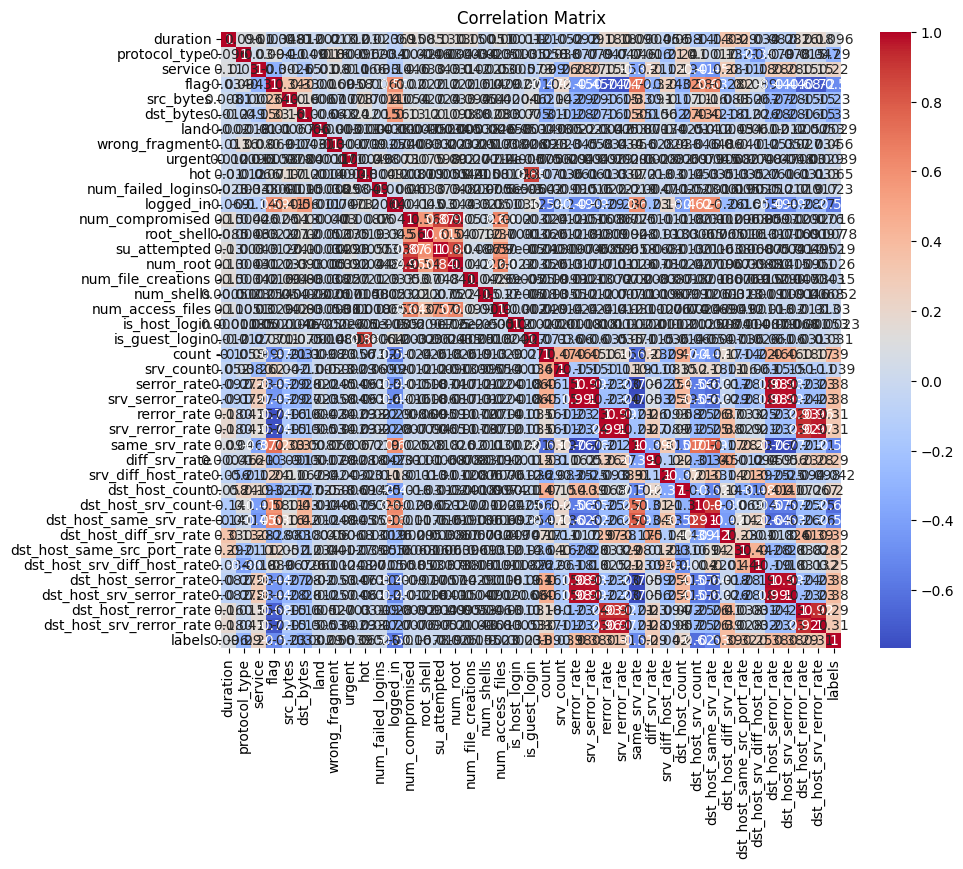

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' representing your NSL-KDD dataset

# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
